In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Timestamp
import warnings
warnings.filterwarnings('ignore')

In [39]:
data=pd.read_csv('/Users/USER/Documents/supermart_sales.csv') 

Analysis by Olumide Fakokunde

In [3]:
data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [5]:
data.isna().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [6]:
data.columns = data.columns.str.replace(' ', '_') # Replacing the space(s) in the colu
data


,Order_ID,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [7]:
data['Order_Date'].unique() #check the uniqueness in the colunm


array(['11-08-2017', '06-12-2017', '10-11-2016', ..., '3/16/2015',
       '8/29/2016', '04-06-2017'], dtype=object)

In [8]:
searchfor = ['/']
data[data.Order_Date.str.contains('|'.join(searchfor))]


,Order_ID,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State
12,OD13,Sharon,Snacks,Cookies,Dindigul,4/15/2018,South,1659,0.19,315.21,Tamil Nadu
14,OD15,Sundar,"Eggs, Meat & Fish",Chicken,Kanyakumari,11/22/2016,Central,831,0.22,207.75,Tamil Nadu
15,OD16,Ramesh,Oil & Masala,Edible Oil & Ghee,Krishnagiri,11/22/2016,Central,1440,0.11,100.80,Tamil Nadu
17,OD18,Arutra,Beverages,Health Drinks,Bodi,5/13/2015,West,1617,0.19,113.19,Tamil Nadu
18,OD19,Haseena,"Eggs, Meat & Fish",Mutton,Tenkasi,8/27/2015,West,1757,0.35,386.54,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9985,OD9986,Shree,"Eggs, Meat & Fish",Mutton,Kanyakumari,11/13/2016,West,1286,0.30,475.82,Tamil Nadu
9987,OD9988,Ganesh,Fruits & Veggies,Fresh Vegetables,Theni,10/19/2015,West,1350,0.15,67.50,Tamil Nadu
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [9]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='mixed')
data['Order_Date'] = data['Order_Date'].dt.strftime('%d-%m-%Y')
print(data)


     Order_ID Customer_Name           Category      Sub_Category         City  \
0         OD1        Harish       Oil & Masala           Masalas      Vellore   
1         OD2         Sudha          Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain        Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson   Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh        Food Grains   Organic Staples         Ooty   
...       ...           ...                ...               ...          ...   
9989   OD9990        Sudeep  Eggs, Meat & Fish              Eggs      Madurai   
9990   OD9991          Alan             Bakery          Biscuits  Kanyakumari   
9991   OD9992          Ravi        Food Grains              Rice         Bodi   
9992   OD9993          Peer       Oil & Masala            Spices   Pudukottai   
9993   OD9994        Ganesh        Food Grains      Atta & Flour  Tirunelveli   

      Order_Date Region  Sa

In [10]:
data


,Order_ID,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,08-11-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,08-11-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,12-06-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,11-10-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,11-10-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,24-12-2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,12-07-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,16-10-2018,West,1659,0.15,597.24,Tamil Nadu


In [11]:
data['Order_Date'].nunique

<bound method IndexOpsMixin.nunique of 0       08-11-2017
1       08-11-2017
2       12-06-2017
3       11-10-2016
4       11-10-2016
           ...    
9989    24-12-2015
9990    12-07-2015
9991    06-06-2017
9992    16-10-2018
9993    17-04-2018
Name: Order_Date, Length: 9994, dtype: object>

# data reduction

In [12]:
data1 = data.drop(['Order_ID'], axis = 1)
data1

,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State
0,Harish,Oil & Masala,Masalas,Vellore,08-11-2017,North,1254,0.12,401.28,Tamil Nadu
1,Sudha,Beverages,Health Drinks,Krishnagiri,08-11-2017,South,749,0.18,149.80,Tamil Nadu
2,Hussain,Food Grains,Atta & Flour,Perambalur,12-06-2017,West,2360,0.21,165.20,Tamil Nadu
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,11-10-2016,South,896,0.25,89.60,Tamil Nadu
4,Ridhesh,Food Grains,Organic Staples,Ooty,11-10-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,24-12-2015,West,945,0.16,359.10,Tamil Nadu
9990,Alan,Bakery,Biscuits,Kanyakumari,12-07-2015,West,1195,0.26,71.70,Tamil Nadu
9991,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,Peer,Oil & Masala,Spices,Pudukottai,16-10-2018,West,1659,0.15,597.24,Tamil Nadu


# Feature Engineering

In [13]:
#Converting a timestamp colunm into string so we can extract 'Year as Yr', 'Month as M
df=data['Order_Date'].astype(str)
#extract 'Year as Yr', 'Month as Mth', 'Date as Dy'
data['Dy'] = df.apply(lambda x: x.split("-")[0])
data['Mth'] = df.apply(lambda x: x.split("-")[1])
data['Yr'] = df.apply(lambda x: x.split("-")[2])
#print our new data
data


,Order_ID,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State,Dy,Mth,Yr
0,OD1,Harish,Oil & Masala,Masalas,Vellore,08-11-2017,North,1254,0.12,401.28,Tamil Nadu,08,11,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,08-11-2017,South,749,0.18,149.80,Tamil Nadu,08,11,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,12-06-2017,West,2360,0.21,165.20,Tamil Nadu,12,06,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,11-10-2016,South,896,0.25,89.60,Tamil Nadu,11,10,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,11-10-2016,South,2355,0.26,918.45,Tamil Nadu,11,10,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,24-12-2015,West,945,0.16,359.10,Tamil Nadu,24,12,2015
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,12-07-2015,West,1195,0.26,71.70,Tamil Nadu,12,07,2015
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu,06,06,2017
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,16-10-2018,West,1659,0.15,597.24,Tamil Nadu,16,10,2018


In [14]:
data = data.drop(['Order_Date'], axis = 1)
data

,Order_ID,Customer_Name,Category,Sub_Category,City,Region,Sales,Discount,Profit,State,Dy,Mth,Yr
0,OD1,Harish,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,Tamil Nadu,08,11,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,Tamil Nadu,08,11,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,Tamil Nadu,12,06,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,0.25,89.60,Tamil Nadu,11,10,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,South,2355,0.26,918.45,Tamil Nadu,11,10,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,West,945,0.16,359.10,Tamil Nadu,24,12,2015
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,West,1195,0.26,71.70,Tamil Nadu,12,07,2015
9991,OD9992,Ravi,Food Grains,Rice,Bodi,West,1567,0.16,501.44,Tamil Nadu,06,06,2017
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,West,1659,0.15,597.24,Tamil Nadu,16,10,2018


# EDA Explotory Data Analysis

In [15]:

data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order_ID,9994,9994,OD1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Name,9994,50,Amrish,227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,9994,7,Snacks,1514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_Category,9994,23,Health Drinks,719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9994,24,Kanyakumari,459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,9994,5,West,3203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,9994.0,NaN,NaN,NaN,1496.596158,577.559036,500.0,1000.0,1498.0,1994.75,2500.0
Discount,9994.0,NaN,NaN,NaN,0.226817,0.074636,0.1,0.16,0.23,0.29,0.35
Profit,9994.0,NaN,NaN,NaN,374.937082,239.932881,25.25,180.0225,320.78,525.6275,1120.95
State,9994,1,Tamil Nadu,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Observation
- Our minimum SALES per day, all through the years is 500.000000, while minimum PROFIT made per day is 25.250000
- Maximum sales made in a day all through the years is 2,500 and - - MINIMUM is 1120.95
- 75% of our sales through the years ranges from 500 to 1994.75
- Profit depends on sales
-  Amrish is our top customer and has visited us 227 times in 4 years
-  Our best selling category is SNACKS with 1514 sales over the years whilw out top sub
-  category is HEALTH DRINKS with 719 sales over the years
- Our region with most customer is the WEST region with 3203 customers
- Our best selling month is NOVEMBER
- Best selling Year is 2018
- Best selling day is 20th


In [16]:
# separating Numerical and categorical variables for easy analysis
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)


Categorical Variables:
Index(['Order_ID', 'Customer_Name', 'Category', 'Sub_Category', 'City',
       'Region', 'State', 'Dy', 'Mth', 'Yr'],
      dtype='object')
Numerical Variables:
['Sales', 'Discount', 'Profit']


# Univariate Analysis

Sales
Skew : 0.0


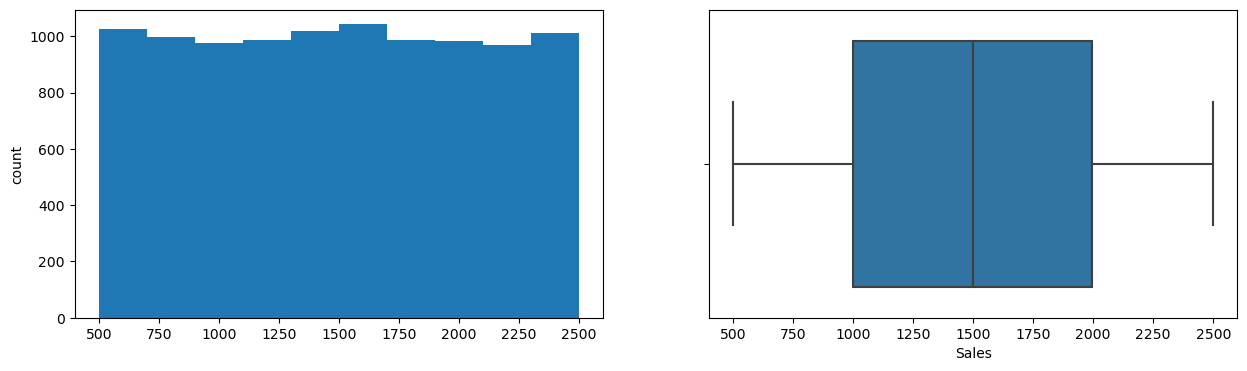

Discount
Skew : -0.03


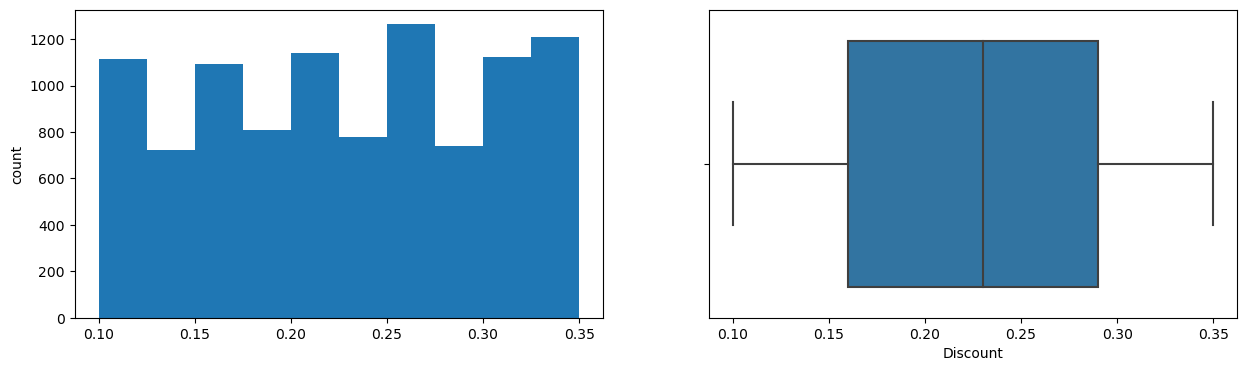

Profit
Skew : 0.77


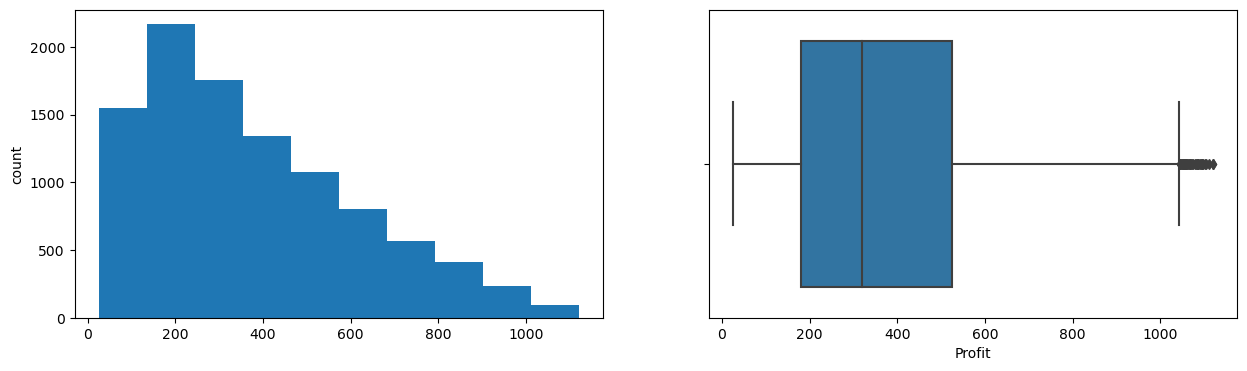

In [17]:
# checking for skewness and outliers in our numeric variable 
for col in num_cols:
 print(col)
 print('Skew :', round(data[col].skew(), 2))
 plt.figure(figsize = (15, 4))
 plt.subplot(1, 2, 1)
 data[col].hist(grid=False)
 plt.ylabel('count')
 plt.subplot(1, 2, 2)
 sns.boxplot(x=data[col])
 plt.show()


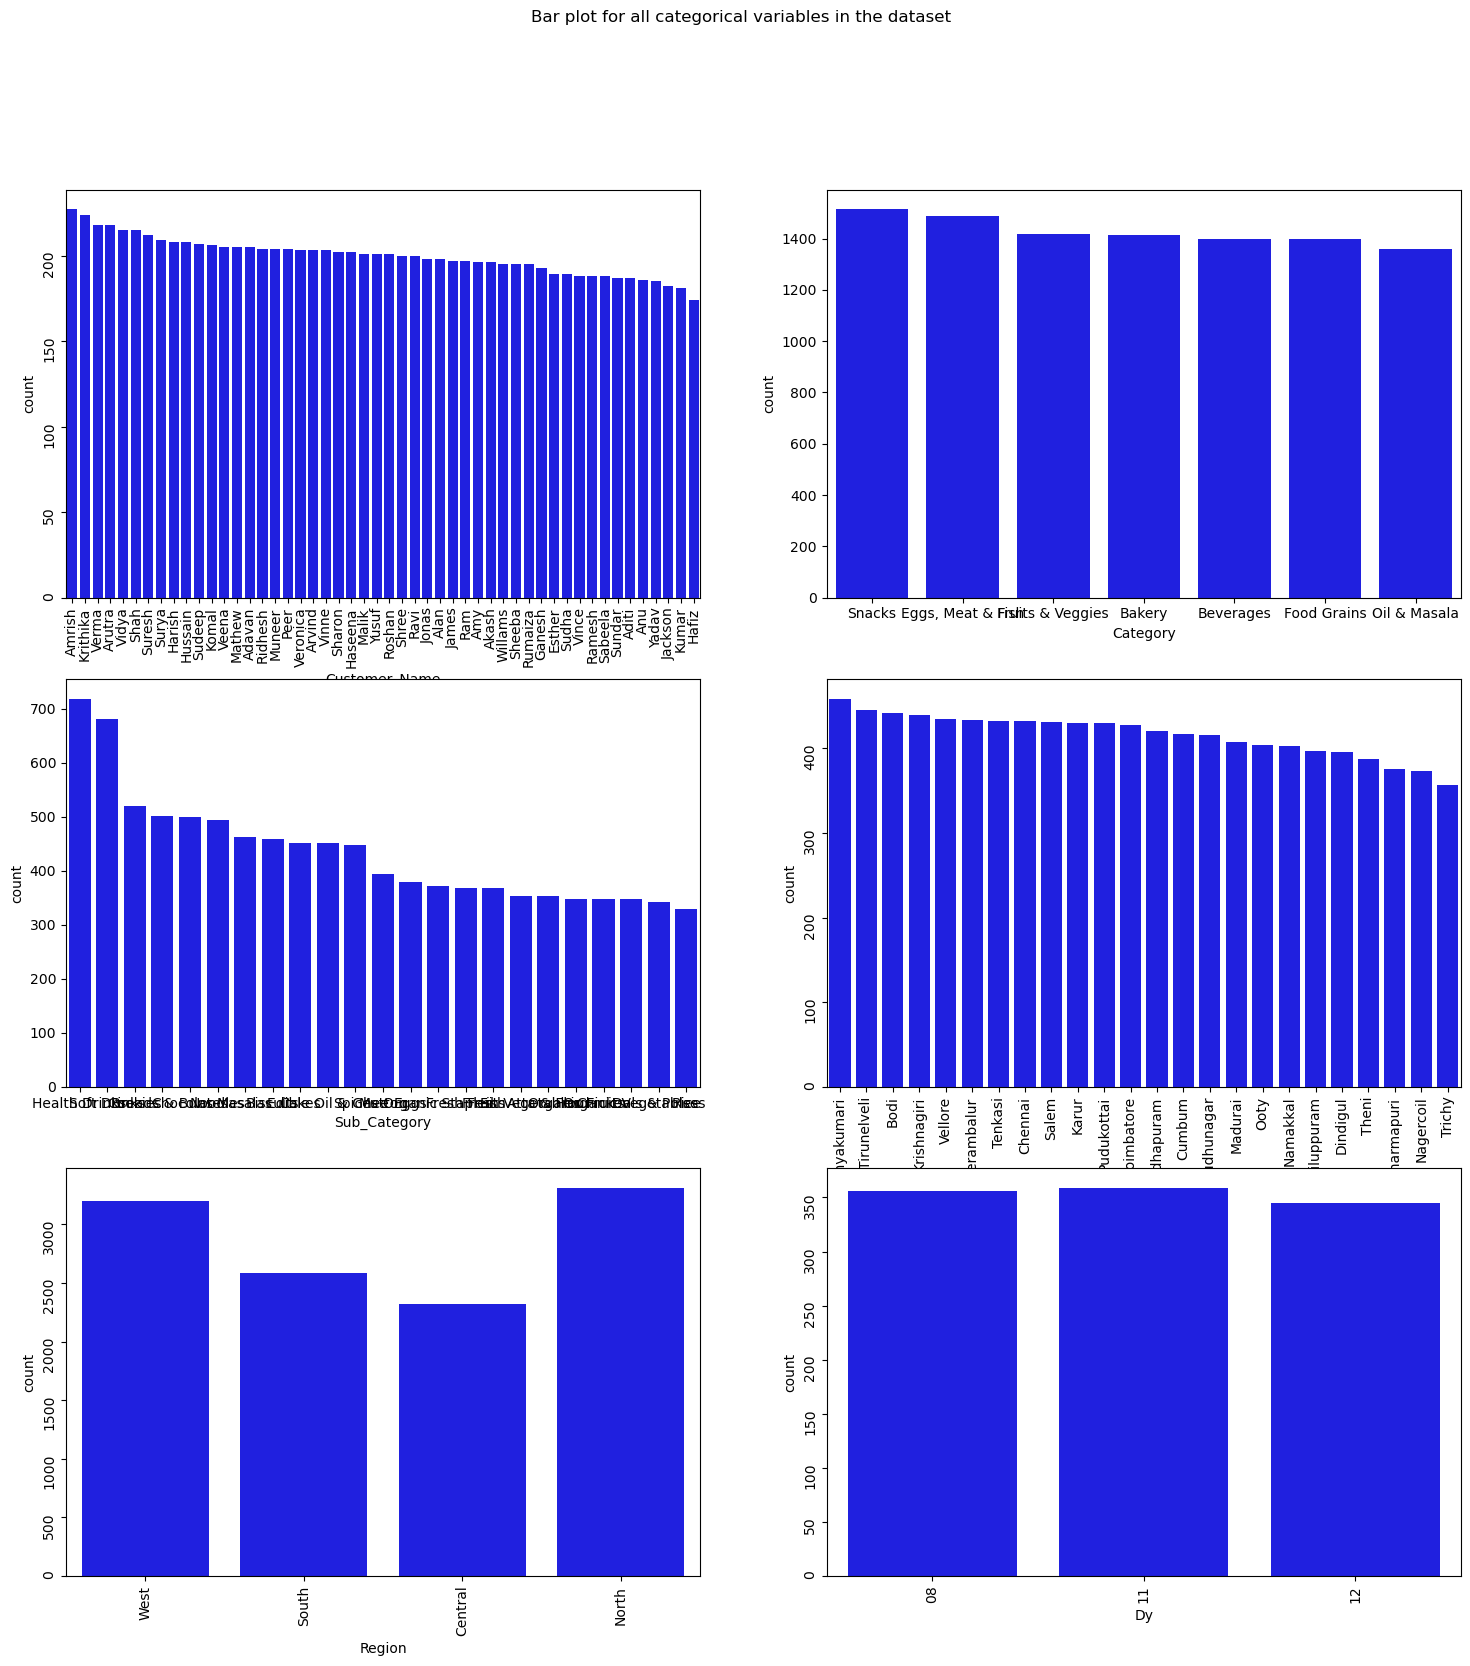

In [18]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[2, 1], x = 'Dy', data = data, color = 'blue',
 order = data['Dy'].head().value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Sub_Category', data = data, color = 'blue',
 order = data['Sub_Category'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Mth', data = data, color = 'blue',
 order = data['Mth'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Yr', data = data, color = 'blue',
 order = data['Yr'].head(20).value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Category', data = data, color = 'blue',
 order = data['Category'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'City', data = data, color = 'blue',
order = data['City'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Region', data = data, color = 'blue',
 order = data['Region'].head(20).value_counts().index);
sns.countplot(ax = axes[0, 0], x = 'Customer_Name', data = data, color = 'blue',
 order = data['Customer_Name'].value_counts().index);
axes[1][1].tick_params(labelrotation=90);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);
axes[0, 0].tick_params(labelrotation=90);


# from the diagrams above we now know that
- Snacks is out top selling category.
- Amrish is our top customer
- 


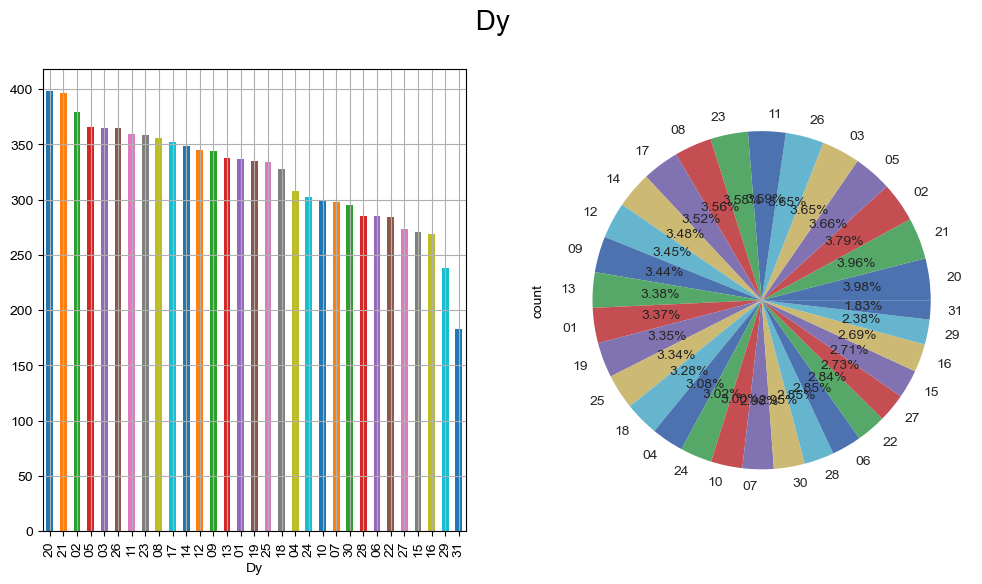

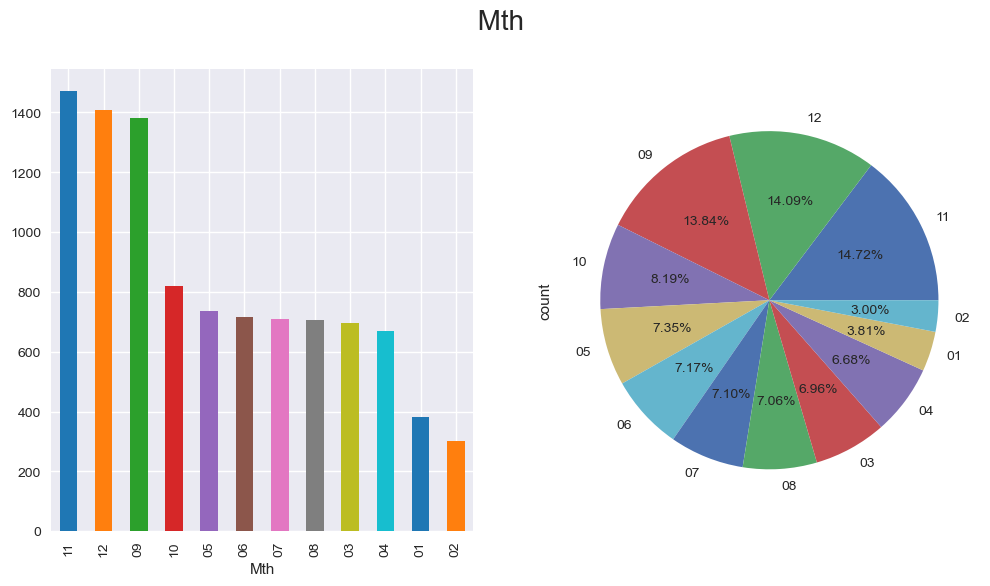

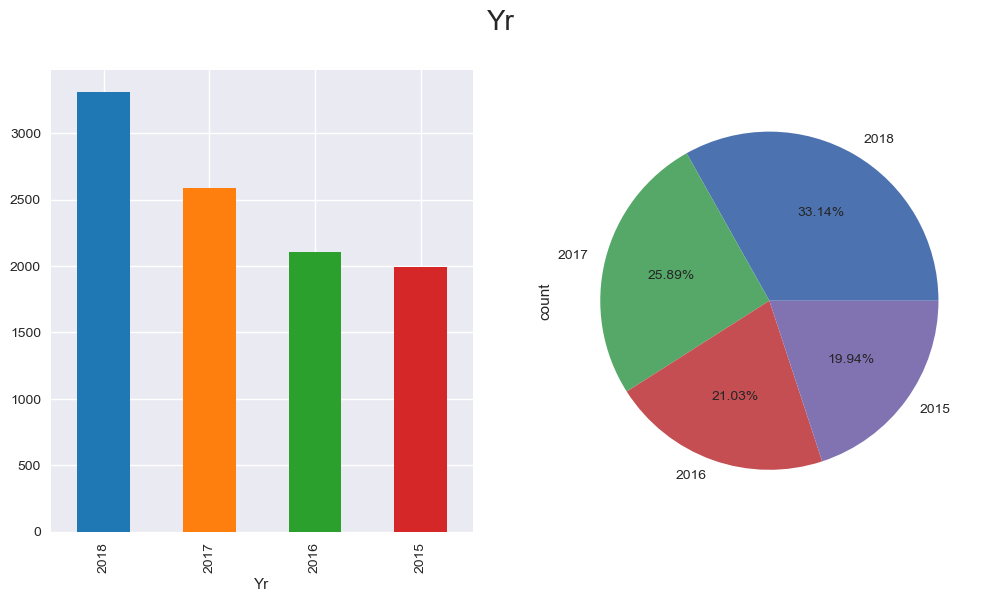

In [38]:
#calculate the % of Order per Year, mth and day 
cols = ['Dy', 'Mth', 'Yr']

for i in cols:
    if i == 'Yr':
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Set figsize here
        fig.suptitle('Yr', fontsize=20)
        plt.style.use('seaborn')
        plt.subplot(1, 2, 1)
        data['Yr'].value_counts().plot(kind='bar', color=sns.color_palette("tab10"))
        plt.subplot(1, 2, 2)
        data['Yr'].value_counts().plot(kind='pie', autopct="%.2f%%")
        plt.show()
    else:
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Set figsize here
        fig.suptitle(' ' + i + ' ', fontsize=20)
        plt.style.use('seaborn')
        plt.subplot(1, 2, 1)
        data[i].value_counts().plot(kind='bar', color=sns.color_palette("tab10"))
        plt.subplot(1, 2, 2)
        data[i].value_counts().plot(kind='pie', autopct="%.2f%%")
        plt.show()


# from we the above charts;
- The highest revenue was generated in 2018
- The highest selling month with 14.72% while february is the lowest with 3.00%


In [20]:
data

,Order_ID,Customer_Name,Category,Sub_Category,City,Region,Sales,Discount,Profit,State,Dy,Mth,Yr
0,OD1,Harish,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,Tamil Nadu,08,11,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,Tamil Nadu,08,11,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,Tamil Nadu,12,06,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,0.25,89.60,Tamil Nadu,11,10,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,South,2355,0.26,918.45,Tamil Nadu,11,10,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,West,945,0.16,359.10,Tamil Nadu,24,12,2015
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,West,1195,0.26,71.70,Tamil Nadu,12,07,2015
9991,OD9992,Ravi,Food Grains,Rice,Bodi,West,1567,0.16,501.44,Tamil Nadu,06,06,2017
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,West,1659,0.15,597.24,Tamil Nadu,16,10,2018


# Bivariate Analysis

<Figure size 1300x1700 with 0 Axes>

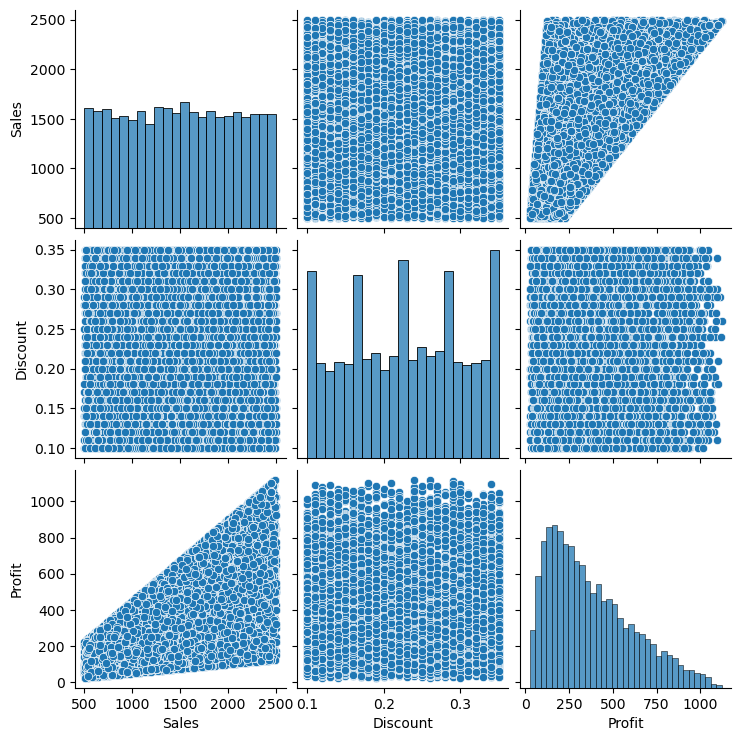

In [21]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data)
plt.show()


 - highest profit was made when discount was at 0.28
- as discount increases, profit decreases
- discount has no effect on sales

In [22]:
data

,Order_ID,Customer_Name,Category,Sub_Category,City,Region,Sales,Discount,Profit,State,Dy,Mth,Yr
0,OD1,Harish,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,Tamil Nadu,08,11,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,Tamil Nadu,08,11,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,Tamil Nadu,12,06,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,0.25,89.60,Tamil Nadu,11,10,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,South,2355,0.26,918.45,Tamil Nadu,11,10,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,West,945,0.16,359.10,Tamil Nadu,24,12,2015
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,West,1195,0.26,71.70,Tamil Nadu,12,07,2015
9991,OD9992,Ravi,Food Grains,Rice,Bodi,West,1567,0.16,501.44,Tamil Nadu,06,06,2017
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,West,1659,0.15,597.24,Tamil Nadu,16,10,2018


# Multivariate analysis

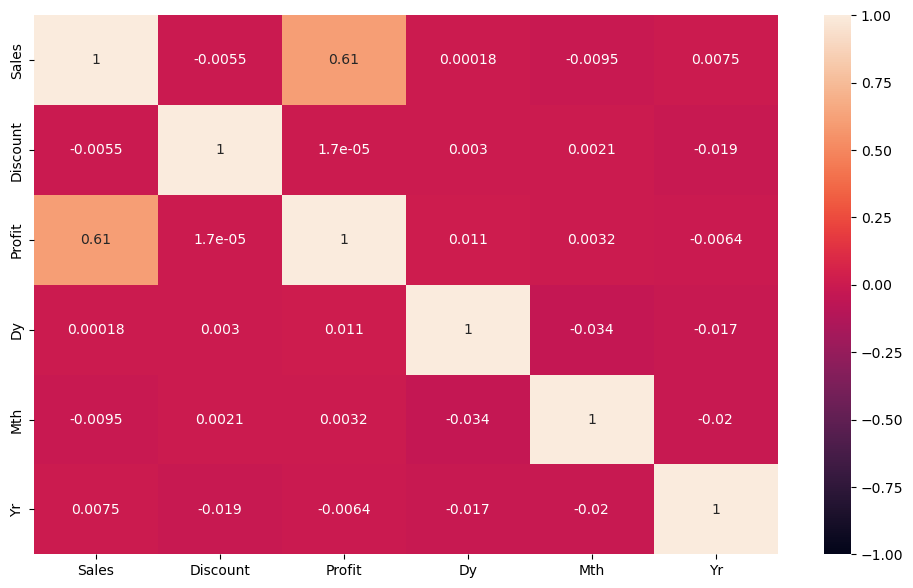

In [24]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['State','Region', 'City', 'Sub_Category', 'Category', 'Customer_Name','Order_ID'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

# Observaton
- The only positive correlation we have is Profit and Sales which indicates that the higher the sales the more profit we make

# Predictive Analysis..Predicting the Profits based on Sales and Discount

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [30]:
x = data.drop(columns=['Order_ID', 'Customer_Name','Category','Sub_Category','City','Region',
                    'State','Dy','Mth','Yr','Profit'], axis=1)
y = data['Profit']

In [31]:
x

,Sales,Discount
0,1254,0.12
1,749,0.18
2,2360,0.21
3,896,0.25
4,2355,0.26
...,...,...
9989,945,0.16
9990,1195,0.26
9991,1567,0.16
9992,1659,0.15


In [32]:
y

0       401.28
1       149.80
2       165.20
3        89.60
4       918.45
         ...  
9989    359.10
9990     71.70
9991    501.44
9992    597.24
9993    165.44
Name: Profit, Length: 9994, dtype: float64

# performing standard scaling

In [33]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [34]:
std_data = scaler.transform(x)
x = std_data
x

array([[-0.420058  , -1.43124646],
       [-1.29447124, -0.62730406],
       [ 1.49499356, -0.22533286],
       ...,
       [ 0.12190505, -0.89528486],
       [ 0.2812041 , -1.02927526],
       [-0.8009905 ,  0.71259993]])

# train and test data

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [36]:
x_train.shape

(7995, 2)

In [37]:
x_test.shape

(1999, 2)